In [1]:
%load_ext lab_black

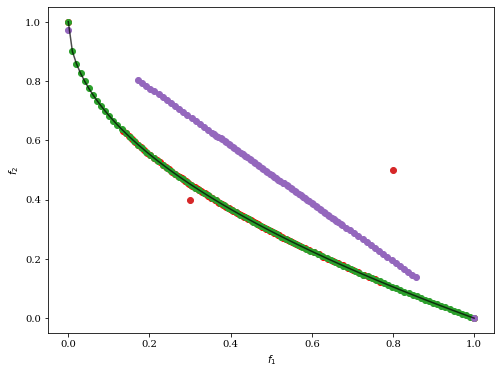

In [2]:
import numpy as np

from pymoo.algorithms.rnsga3 import RNSGA3
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")
pf = problem.pareto_front()

# Define reference points
ref_points = np.array([[0.3, 0.4], [0.8, 0.5]])

# Get Algorithm
algorithm = RNSGA3(ref_points=ref_points, pop_per_ref_point=50, mu=0.5)

res = minimize(
    problem,
    algorithm=algorithm,
    termination=("n_gen", 600),
    pf=pf,
    seed=1,
    verbose=False,
)

reference_directions = res.algorithm.survival.ref_dirs

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, color="red")
plot.add(pf, label="pf")
plot.add(ref_points, label="ref_points")
plot.add(reference_directions, label="ref_dirs")
plot.show()